# Diamond Price Prediction
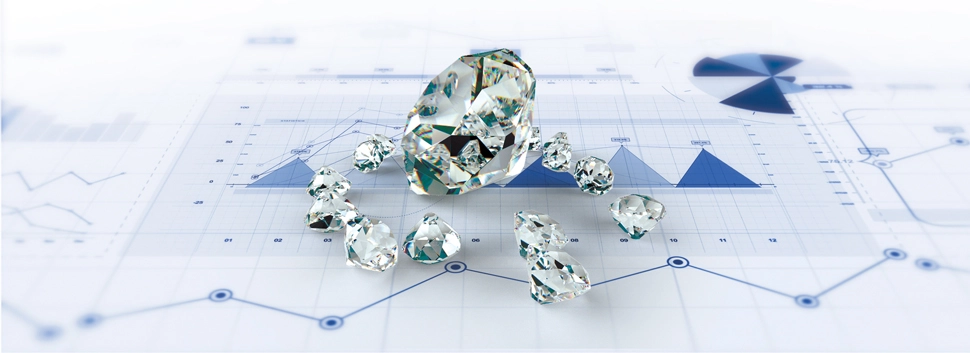

### Load & Understand Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('D:\PGP IN DATA SCIENCE with Careerera\Data Sets\ML Datasets\\diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### Drop Column 'Unnamed: 0'

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
print("Shape : {} & Size {} of data".format(df.shape, df.size))

Shape : (53940, 10) & Size 539400 of data


In [11]:
print("Data Types:")
df.dtypes

Data Types:


carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [12]:
print("Info() Function")
df.info()

Info() Function
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [13]:
print("Descriptive Statistics :")
df.describe()

Descriptive Statistics :


,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Missing values

In [14]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No Missing values

### Feature Engineering

### Create new column "Size" by calculating (length x width x depth) of the diamond

In [4]:
df["size"] = df["x"] * df["y"] * df["z"]
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856


### Relationship between Diamond Price and Diamond Weight in Carat wrt "Cut"

Text(0.5, 1.0, 'Relationship between Diamond Price and Diamond Weight in Carat wrt "Cut"')

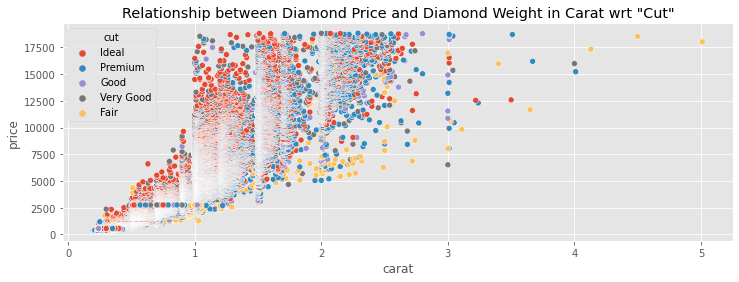

In [9]:
plt.figure(figsize=(12,4))
sns.scatterplot(data = df, x="carat",
                    y="price", 
                    hue= "cut")
plt.title('Relationship between Diamond Price and Diamond Weight in Carat wrt "Cut"')

**Trendline for all types of cut have positive slope, that means as the Carat increases the Price of the Diamond increases.**

**Trendline for Idea Cut is having maximum slope, means Idea Cut Diamond have Highest price wrt to Carat.**

### Relationship between Diamond Price and Diamond Weight in Carat wrt "Color"

Text(0.5, 1.0, 'Relationship between Diamond Price and Diamond Weight in Carat wrt "Color"')

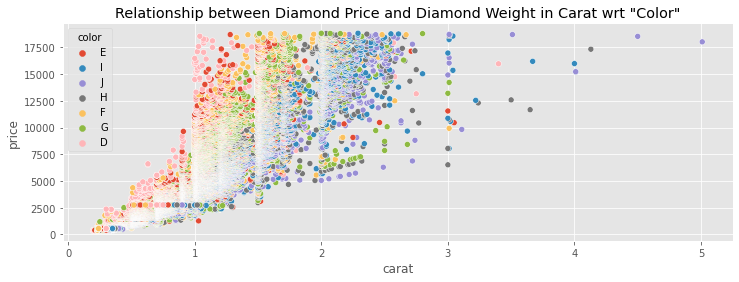

In [10]:
plt.figure(figsize=(12,4))
sns.scatterplot(data = df, x="carat",
                    y="price", 
                    hue= "color")
plt.title('Relationship between Diamond Price and Diamond Weight in Carat wrt "Color"')

### Relationship between Diamond Price and Diamond Size in Carat wrt "Cut"

Text(0.5, 1.0, 'Relationship between Diamond Price and Diamond Size in Carat wrt "Cut"')

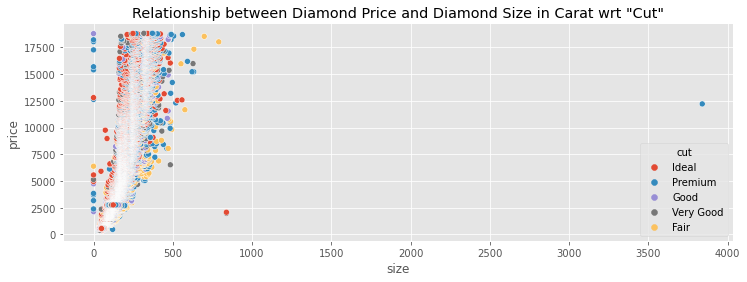

In [11]:
plt.figure(figsize=(12,4))
sns.scatterplot(data = df, x="size",
                    y="price", 
                    hue= "cut")
plt.title('Relationship between Diamond Price and Diamond Size in Carat wrt "Cut"')

**Premium cut diamonds are relatively large than other diamonds**

**There is a linear relationship between the size of all types of diamonds and their prices**

### Correlation of all features with Price of Diamond

In [12]:
correlation = df.corr()
print(correlation["price"].sort_values(ascending=False))

price    1.000000
carat    0.921591
size     0.902385
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


**Carat, Size, X(length), Y(Width), Z(Height) are highly correlated.**

**Table is partially correlated with Diamond Price.**

**Depth is Negatively Correlated.**

### Convert all the object column to integer using Label Encoding

#### Replace all Unique values in Cut column to meaningful integer

In [14]:
df.replace({"Ideal": 1, "Premium": 2, "Good": 3,
            "Very Good": 4, "Fair": 5}, inplace=True)
df.cut.unique()

array([1, 2, 3, 4, 5], dtype=int64)

#### Replace all Unique values in Color column to meaningful integer

In [19]:
df.replace({"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7},inplace=True)
df.color.unique()

array([2, 6, 7, 5, 3, 4, 1], dtype=int64)

#### Replace all Unique values in Clarity column to meaning integer

In [21]:
df.replace({"I1":8, "SI2":7, "SI1":6, "VS2":5, "VS1":4,"VVS2":3,"VVS1":2,"IF":1}, inplace=True)
df.clarity.unique()

array([7, 6, 4, 5, 3, 2, 8, 1], dtype=int64)

## Predict Diamond Price using Different Regression models

### Dividing data into dependent(y) & independent(X) features
- Here we are going to take only **Size** feature instead of taking **x,y,z**, because we created **Size** column using **x,y,z**

In [60]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'size'],
      dtype='object')

In [61]:
X=df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'size']]
y=df['price']
print("Independent Features\n", X.head(5))
print('\n')
print("Dependent Features\n", y.head(5))

Independent Features
    carat  cut  color  clarity  depth  table       size
0   0.23    1      2        7   61.5   55.0  38.202030
1   0.21    2      2        6   59.8   61.0  34.505856
2   0.23    3      2        4   56.9   65.0  38.076885
3   0.29    2      6        5   62.4   58.0  46.724580
4   0.31    3      7        7   63.3   58.0  51.917250


Dependent Features
 0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64


### Train Test Split

In [75]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.25, random_state=0)
print("Train size", x_train.shape)
print("Test size", y_test.shape)

Train size (40455, 7)
Test size (13485,)


## 1. Simple Linear Regression

### Create model, fit the model & predict

In [100]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
y_pred

array([5235.40553548, 7352.29938033, 6187.21314954, ..., 4045.85645578,
       4324.45657069, 1356.49438618])

### Evaluate the Model

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(10)
mape=mean_absolute_percentage_error(y_test,y_pred).round(2)*100
r2=r2_score(y_pred,y_test)*100

result=pd.DataFrame({'Model':'Linear Regression', 'RMSE':[rmse], 'MAPE':[mape], 'R2 Score':[r2]})
result

,Model,RMSE,MAPE,R2 Score
0,Linear Regression,1233.502911,49.0,89.45584


**RMSE is High, R2 Score is 89.45%, We Expected R2 Score near to 100%.**

## 2. Lasso (L1) Regression

### Create model, fit the model & predict

In [102]:
from sklearn.linear_model import Lasso

model=Lasso()
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
y_pred

array([5235.58196588, 7350.73852229, 6187.27417314, ..., 4046.26635923,
       4320.11150997, 1358.15197503])

### Evaluate the model

In [103]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(10)
mape=mean_absolute_percentage_error(y_test,y_pred).round(2)*100
r2=r2_score(y_pred,y_test)*100

results=pd.DataFrame({'Model':'Lasso Regression', 'RMSE':[rmse], 'MAPE':[mape], 'R2 Score':[r2]})
result=pd.concat([result,results])
result

,Model,RMSE,MAPE,R2 Score
0,Linear Regression,1233.502911,49.0,89.455840
0,Lasso Regression,1233.404382,49.0,89.442281


**Results are same.**

## 3. Ridge (L2) Regression

### Create & fit the model & predict

In [104]:
from sklearn.linear_model import Ridge

model=Ridge()
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
y_pred

array([5235.4247867 , 7351.97469018, 6187.11620049, ..., 4045.80367421,
       4324.05925871, 1356.81067517])

### Evaluate the model

In [105]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(10)
mape=mean_absolute_percentage_error(y_test,y_pred).round(2)*100
r2=r2_score(y_pred,y_test)*100

results=pd.DataFrame({'Model':'Ridge Regression', 'RMSE':[rmse], 'MAPE':[mape], 'R2 Score':[r2]})
result=pd.concat([result,results])
result

,Model,RMSE,MAPE,R2 Score
0,Linear Regression,1233.502911,49.0,89.455840
0,Lasso Regression,1233.404382,49.0,89.442281
0,Ridge Regression,1233.482174,49.0,89.453355


**Results are still Same.**

## 4. Decision Tree Regressor

### Create, fit the model & predict

In [106]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(random_state=0)
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
y_pred

array([4620., 7527., 5233., ..., 2721., 2852., 1326.])

### Evaluate the model

In [107]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(10)
mape=mean_absolute_percentage_error(y_test,y_pred).round(2)*100
r2=r2_score(y_pred,y_test)*100

results=pd.DataFrame({'Model':'Decision Tree Regressor', 'RMSE':[rmse], 'MAPE':[mape], 'R2 Score':[r2]})
result=pd.concat([result,results])
result

,Model,RMSE,MAPE,R2 Score
0,Linear Regression,1233.502911,49.0,89.455840
0,Lasso Regression,1233.404382,49.0,89.442281
0,Ridge Regression,1233.482174,49.0,89.453355
0,Decision Tree Regressor,726.789969,10.0,96.690366


**RMSE is very low as compare to Previous all methods & R2 Score is 96.69% which is very good.**

## 5. Random Forest Regressor

### Create, Fit & predict the values

In [110]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100,
    criterion='squared_error',
    max_depth=None,
    random_state=0)
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
y_pred

array([4608.51      , 7184.643     , 5332.234     , ..., 3058.69333333,
       3070.03333333, 1209.78833333])

### Evaluate the model

In [112]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(10)
mape=mean_absolute_percentage_error(y_test,y_pred).round(2)*100
r2=r2_score(y_pred,y_test)*100

results=pd.DataFrame({'Model':'Random Forest Regressor', 'RMSE':[rmse], 'MAPE':[mape], 'R2 Score':[r2]})
result=pd.concat([result,results])
result

,Model,RMSE,MAPE,R2 Score
0,Linear Regression,1233.502911,49.0,89.455840
0,Lasso Regression,1233.404382,49.0,89.442281
0,Ridge Regression,1233.482174,49.0,89.453355
0,Decision Tree Regressor,726.789969,10.0,96.690366
0,Random Forest Regressor,547.965252,8.0,98.082887


**RMSE is very low as compare to Decision Tree Regressor & R2 Score is 98% which is Excellent.**

## 6. XGBoost

### Create, fit & predict

In [113]:
from xgboost import XGBRegressor

model=XGBRegressor(verbosity=0)
model_fit=model.fit(x_train,y_train)
y_pred=model_fit.predict(x_test)
y_pred

array([4688.3926, 6846.9565, 5362.3174, ..., 3155.8506, 3016.8777,
       1142.4908], dtype=float32)

### Evaluate the model

In [114]:
rmse=np.sqrt(mean_squared_error(y_test, y_pred)).round(10)
mape=mean_absolute_percentage_error(y_test,y_pred).round(2)*100
r2=r2_score(y_pred,y_test)*100

results=pd.DataFrame({'Model':'XGBoost Regressor', 'RMSE':[rmse], 'MAPE':[mape], 'R2 Score':[r2]})
result=pd.concat([result,results])
result.set_index('Model')

,RMSE,MAPE,R2 Score
Model,,,
Linear Regression,1233.502911,49.0,89.455840
Lasso Regression,1233.404382,49.0,89.442281
Ridge Regression,1233.482174,49.0,89.453355
Decision Tree Regressor,726.789969,10.0,96.690366
Random Forest Regressor,547.965252,8.0,98.082887
XGBoost Regressor,535.822110,8.0,98.173052


**Results are some what better than Random Forest.**

### Conclusion:
**From Above Chart we can clearly See that,**

1. **Decision Tree Regressor**
2. **Random Forest Regressor**
3. **XGBoost**

**are the good models to predict diamond price but XGBoost is the best among all.**